In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd

#storing the dataset into the variable dataset, also making the "DATE" column the index column
dataset = pd.read_csv("/content/drive/MyDrive/tweaks/weather.csv", index_col="DATE")


In [23]:
#For each column, store the percentage of missing values
miss_pct = dataset.apply(pd.isnull).sum()/dataset.shape[0]

In [24]:
#print the missing values percentages for each column
miss_pct

,0
STATION,0.000000
NAME,0.000000
ACMH,0.524697
ACSH,0.524549
AWND,0.253967
FMTM,0.496925
PGTM,0.281145
PRCP,0.000099
PSUN,0.746528
SNOW,0.000000


In [25]:
#list columns with low miss_pct (good columns) "feel free to tweak the threshold of how low we want missing values to be"
good_columns = dataset.columns[miss_pct < 0.01]

In [ ]:
good_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'TMAX', 'TMIN'], dtype='object')

In [26]:
dataset = dataset[good_columns].copy()

In [31]:
dataset

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
1970-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,29,16
1970-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,28,19
1970-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.14,2.2,30,17
1970-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.02,0.2,27,19
1970-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,30,18
...,...,...,...,...,...,...
2025-03-12,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,50,33
2025-03-13,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,44,34
2025-03-14,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,46,35


In [30]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

,0
STATION,0.000000
NAME,0.000000
PRCP,0.000099
SNOW,0.000000
TMAX,0.000000
TMIN,0.000000


In [32]:
#Since the "PRCP" column has missin values, we fill the missing values with zero since
#if there was no PRCP recorded for that day then that must mean that it did not rain therefore PRCP would be zero

dataset["PRCP"] = dataset["PRCP"].fillna(0)

In [33]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

,0
STATION,0.0
NAME,0.0
PRCP,0.0
SNOW,0.0
TMAX,0.0
TMIN,0.0


In [34]:
dataset.dtypes

,0
STATION,object
NAME,object
PRCP,float64
SNOW,float64
TMAX,int64
TMIN,int64


In [35]:
dataset.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
       '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15', '2025-03-16'],
      dtype='object', name='DATE', length=20164)

In [37]:
#Change dtype from object to datetime
dataset.index = pd.to_datetime(dataset.index)

In [38]:
dataset.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10',
               '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14',
               '2025-03-15', '2025-03-16'],
              dtype='datetime64[ns]', name='DATE', length=20164, freq=None)

In [39]:
#Example of why convertingg dates from object to dates is helpful:
dataset.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=20164)

In [40]:
#Check for gaps in dataset (if certain years have more rows than others, ideally each year should have around 365 ish rows)
dataset.index.year.value_counts().sort_index()

,count
DATE,
1970,365
1971,365
1972,366
1973,365
1974,365
1975,365
1976,366
1977,365
1978,365


<Axes: xlabel='DATE'>

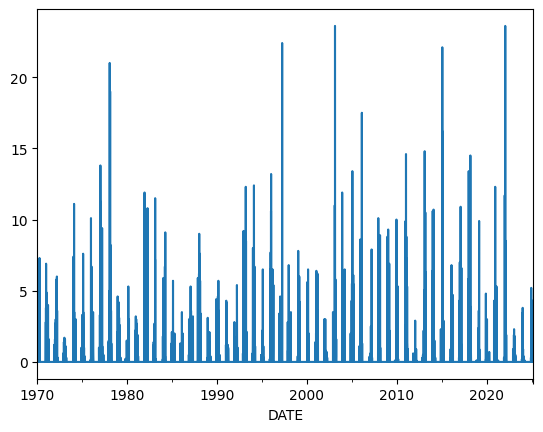

In [41]:
#Plot of snow depth in Boston.
dataset["SNOW"].plot()

In [44]:
dataset["tmrw_temp"] = dataset.shift(-1)["TMAX"]

In [45]:
dataset

,STATION,NAME,PRCP,SNOW,TMAX,TMIN,tmrw_temp
DATE,,,,,,,
1970-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,29,16,28.0
1970-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,28,19,30.0
1970-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.14,2.2,30,17,27.0
1970-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.02,0.2,27,19,30.0
1970-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,30,18,31.0
...,...,...,...,...,...,...,...
2025-03-12,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,50,33,44.0
2025-03-13,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,44,34,46.0
2025-03-14,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,46,35,62.0


In [46]:
#Filling last tmrw_temp with the one before since we don't know tmrw_temp actual temp for a day that has not yet come!
dataset = dataset.ffill()


In [47]:
dataset

,STATION,NAME,PRCP,SNOW,TMAX,TMIN,tmrw_temp
DATE,,,,,,,
1970-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,29,16,28.0
1970-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,28,19,30.0
1970-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.14,2.2,30,17,27.0
1970-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.02,0.2,27,19,30.0
1970-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,30,18,31.0
...,...,...,...,...,...,...,...
2025-03-12,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,50,33,44.0
2025-03-13,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,44,34,46.0
2025-03-14,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,46,35,62.0


In [48]:
#Using pearson correlation coefficient between the numeric predictors
dataset.corr(numeric_only=True)

,PRCP,SNOW,TMAX,TMIN,tmrw_temp
PRCP,1.000000,0.214544,-0.032403,0.022414,-0.053269
SNOW,0.214544,1.000000,-0.196973,-0.192492,-0.200243
TMAX,-0.032403,-0.196973,1.000000,0.943460,0.888540
TMIN,0.022414,-0.192492,0.943460,1.000000,0.887599
tmrw_temp,-0.053269,-0.200243,0.888540,0.887599,1.000000


In [49]:
#As we can see, TMAX and TMIN are heavily correlated, TMAX and tmrw_temp are also heavily correlated. Other predictors are not highly correlated which makes sense

In [50]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 0.1)
#Initializing predictors
predictors = ['TMAX', 'TMIN', 'PRCP', 'SNOW']



In [51]:
predictors

['TMAX', 'TMIN', 'PRCP', 'SNOW']

In [52]:
#In this example the model starts predicting after it 10 years, (training on 10 years and predicting the next years till 2025 in 90 day intervals to account for seasons and such)
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        #training is from day 1 to i, i here is 3650 so training would be done on first 10 years in this case!
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        #fitting the model giving it the predictors and the target to train on
        model.fit(train[predictors], train["tmrw_temp"])

        #predicting the taregt for the test data but here we're obviously only given the predictors and our goal is to predict the target
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)


        #combining each 90 day interval into one big list:
        combined = pd.concat([test["tmrw_temp"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [53]:
predictions_10 = backtest(dataset, model, predictors)

In [54]:
predictions_10

,actual,prediction,diff
DATE,,,
1979-12-30,41.0,45.715186,4.715186
1979-12-31,38.0,42.296653,4.296653
1980-01-01,37.0,40.977633,3.977633
1980-01-02,32.0,40.537959,8.537959
1980-01-03,27.0,34.665445,7.665445
...,...,...,...
2025-03-12,44.0,49.771070,5.771070
2025-03-13,46.0,47.646657,1.646657
2025-03-14,62.0,49.045327,12.954673


In [55]:
#Measurin how accurate our model is using mean absolute error:

predictions_10["diff"].mean()


np.float64(6.341822584429666)

In [56]:
#Attempting to improve accuracy (reduce average difference in temperature) by increasing by increasing the amount of data we train on from 10 years to 30 years:
prediction_30 = backtest(dataset, model, predictors, start=3650*3)

In [57]:
prediction_30

,actual,prediction,diff
DATE,,,
1999-12-25,41.0,27.943784,13.056216
1999-12-26,32.0,39.102532,7.102532
1999-12-27,26.0,37.300992,11.300992
1999-12-28,34.0,31.536960,2.463040
1999-12-29,49.0,38.169335,10.830665
...,...,...,...
2025-03-12,44.0,49.769964,5.769964
2025-03-13,46.0,47.645338,1.645338
2025-03-14,62.0,49.044058,12.955942


In [58]:
prediction_30["diff"].mean()

np.float64(6.285270333624122)

In [ ]:
#I noticed a slight reduction, but there seems to be another approach worth investigating to reduce averae error.

In [ ]:
#To do next:
#Explore creating new predictors that prioratizes recent data over old data or something in that regards.

Evaluating the Performance of **XGBoost** and Ridge Regression Models for Temperature Forecasting

,Ridge,XGBoost,Actual
DATE,,,
1979-12-30,45.715186,44.481487,41.0
1979-12-31,42.296653,38.694950,38.0
1980-01-01,40.977633,40.789848,37.0
1980-01-02,40.537959,39.825790,32.0
1980-01-03,34.665445,38.478336,27.0
...,...,...,...
2025-03-12,49.771070,49.388367,44.0
2025-03-13,47.646657,45.258865,46.0
2025-03-14,49.045327,47.774887,62.0


,Model,MAE
0,Ridge,6.341823
1,XGBoost,6.348187


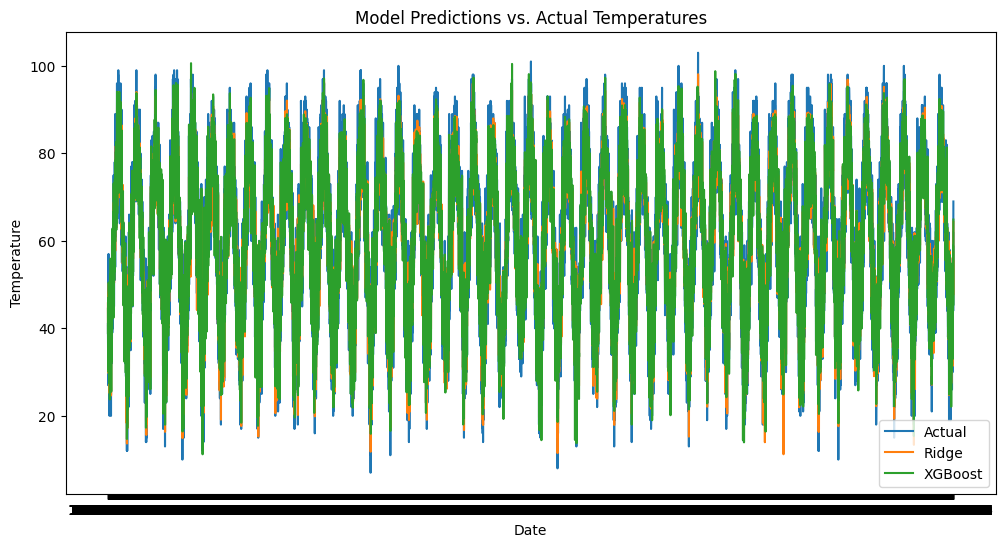

In [77]:
import pandas as pd
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and preprocessing
dataset = pd.read_csv('/content/drive/My Drive/tweaks/weather.csv', index_col="DATE")


# Define backtest function
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    weather['tmrw_temp'] = weather['TMAX'].shift(-1)
    weather = weather.ffill()
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i + step), :]

        # Model fitting and prediction
        model.fit(train[predictors], train["tmrw_temp"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)

        combined = pd.concat([test["tmrw_temp"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

# Initialize models and predictors
ridge_model = Ridge(alpha=0.1)
xgb_model = XGBRegressor()
predictors = ['TMAX', 'TMIN', 'PRCP', 'SNOW']

# Run backtests and combine predictions
predictions_ridge = backtest(dataset, ridge_model, predictors)
predictions_xgb = backtest(dataset, xgb_model, predictors)

# Create a DataFrame to store predictions and actual values
combined_predictions = pd.DataFrame(index=predictions_ridge.index)
combined_predictions["Ridge"] = predictions_ridge["prediction"]
combined_predictions["XGBoost"] = predictions_xgb["prediction"]
combined_predictions["Actual"] = predictions_ridge["actual"]

# Calculate MAE for each model
from sklearn.metrics import mean_absolute_error

mae_ridge = mean_absolute_error(combined_predictions["Actual"], combined_predictions["Ridge"])
mae_xgb = mean_absolute_error(combined_predictions["Actual"], combined_predictions["XGBoost"])

# Create accuracy table
accuracy_table = pd.DataFrame({
    "Model": ["Ridge", "XGBoost"],
    "MAE": [mae_ridge, mae_xgb]
})

# Display predictions and accuracy table
display(combined_predictions)
display(accuracy_table)

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=combined_predictions.index, y=combined_predictions["Actual"], label="Actual")
sns.lineplot(x=combined_predictions.index, y=combined_predictions["Ridge"], label="Ridge")
sns.lineplot(x=combined_predictions.index, y=combined_predictions["XGBoost"], label="XGBoost")
plt.title("Model Predictions vs. Actual Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

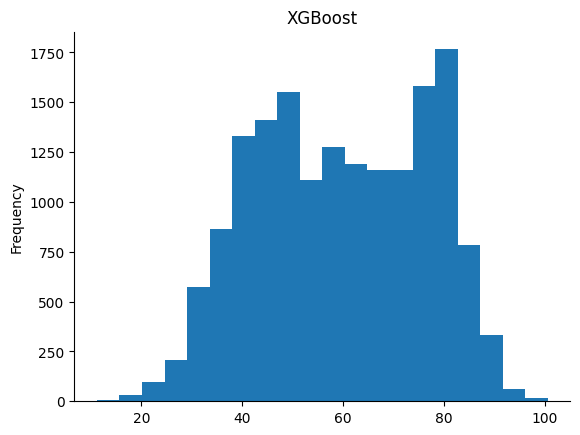

In [83]:
# @title XGBoost

from matplotlib import pyplot as plt
combined_predictions['XGBoost'].plot(kind='hist', bins=20, title='XGBoost')
plt.gca().spines[['top', 'right',]].set_visible(False)

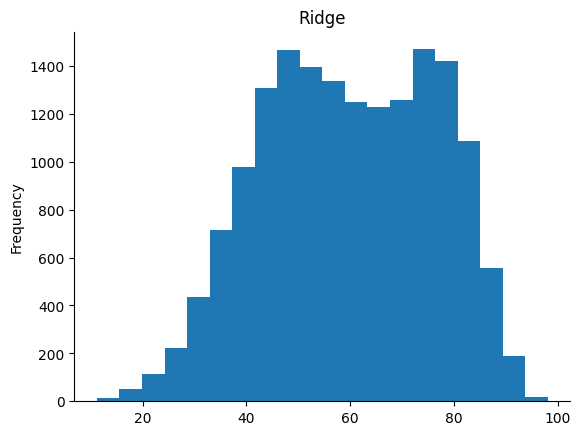

In [82]:
# @title Ridge

from matplotlib import pyplot as plt
combined_predictions['Ridge'].plot(kind='hist', bins=20, title='Ridge')
plt.gca().spines[['top', 'right',]].set_visible(False)

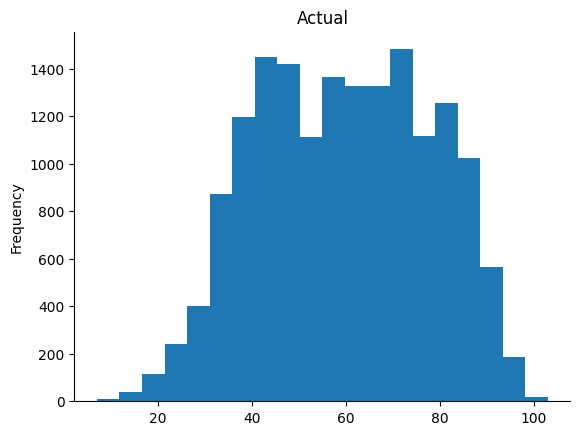

In [81]:
# @title Actual

from matplotlib import pyplot as plt
combined_predictions['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

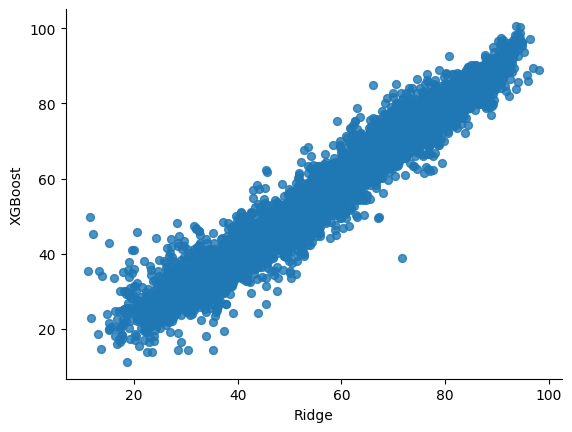

In [80]:
# @title Ridge vs XGBoost

from matplotlib import pyplot as plt
combined_predictions.plot(kind='scatter', x='Ridge', y='XGBoost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

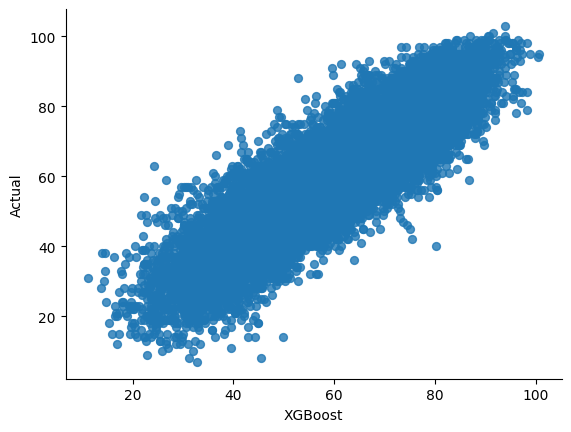

In [79]:
# @title XGBoost vs Actual

from matplotlib import pyplot as plt
combined_predictions.plot(kind='scatter', x='XGBoost', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)